# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ExtraaLearn.csv')

In [6]:
data = df.copy() # Making a copy of the data so as to not make permanent changes to the original dataframe.

In [7]:
data.head() # Viewing the first 5 columns so as to get a glimpse of the dataframe.

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [8]:
data.info() # Checking for null values, and checking the data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [9]:
data.apply(lambda col: col.duplicated().sum()) # This was done so we can check manually which features might be useless.

,0
ID,0
age,4566
current_occupation,4609
first_interaction,4610
profile_completed,4609
website_visits,4585
time_spent_on_website,2989
page_views_per_visit,2198
last_activity,4609
print_media_type1,4610


In [10]:
data.shape

(4612, 15)

In [81]:
data.isnull().sum() # Double checking for null values.

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [13]:
data.drop(["ID"], axis=1, inplace=True) # Dropping the ID column, since it had no repeated values and has no valuable information.

In [14]:
numerical_data = data.select_dtypes(include=[np.number]) # Separating numerical and categorical data for improved visualization.
categorical_data = data.select_dtypes(exclude=[np.number])

## EDA

- It is a good idea to explore the data once again after manipulating it.

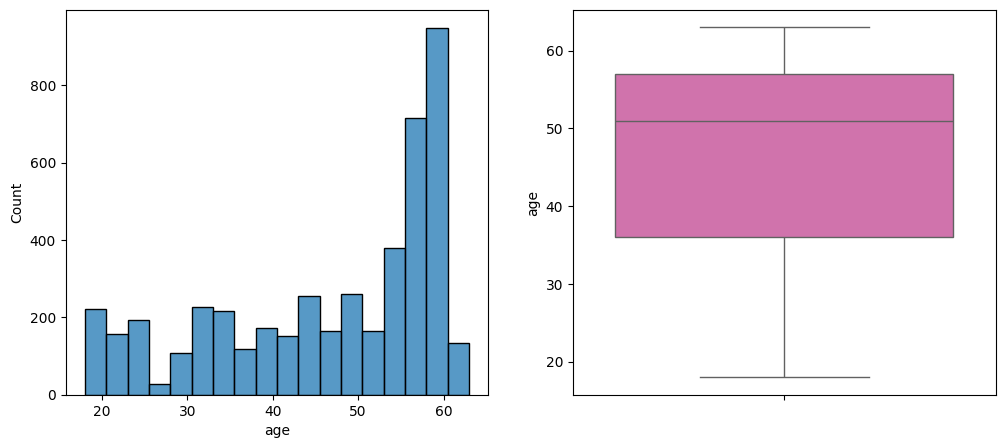

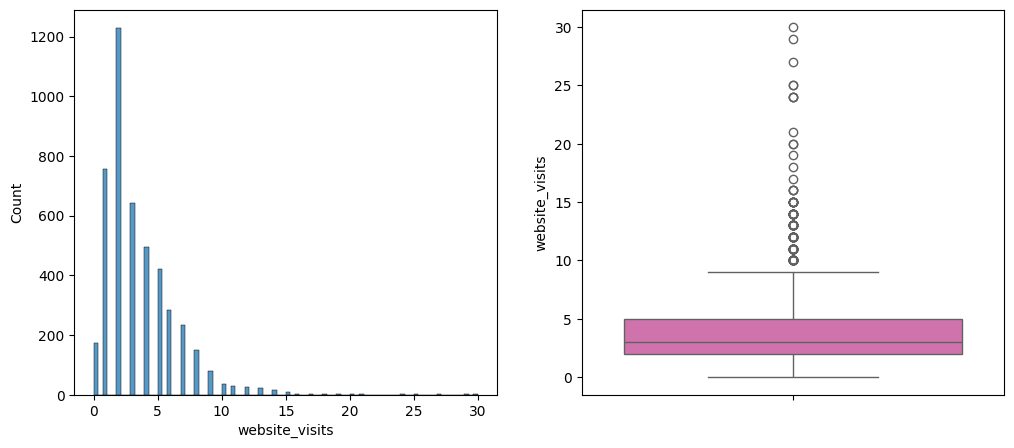

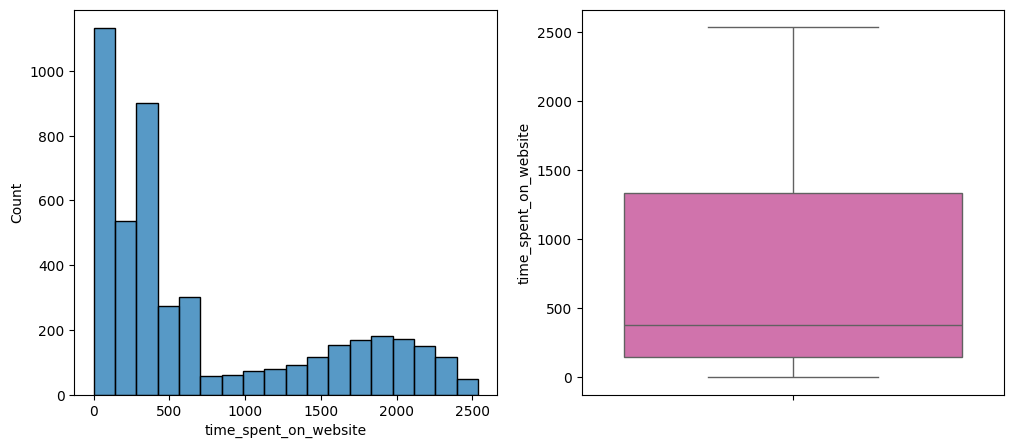

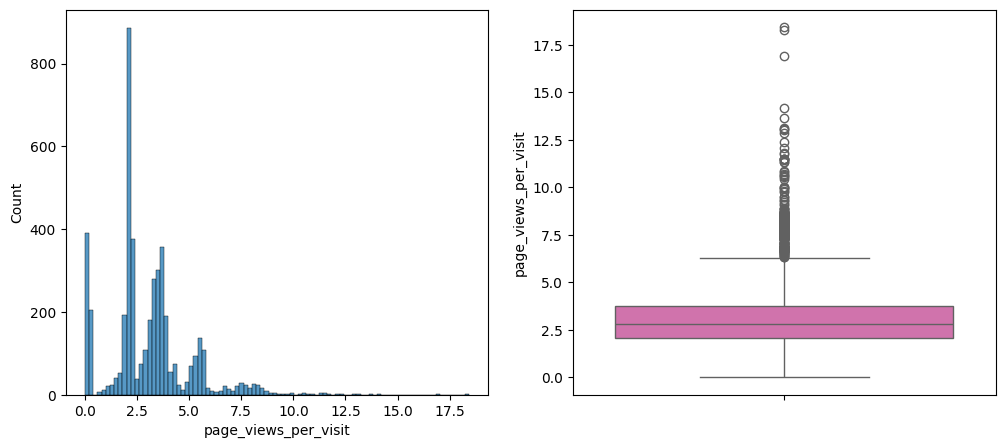

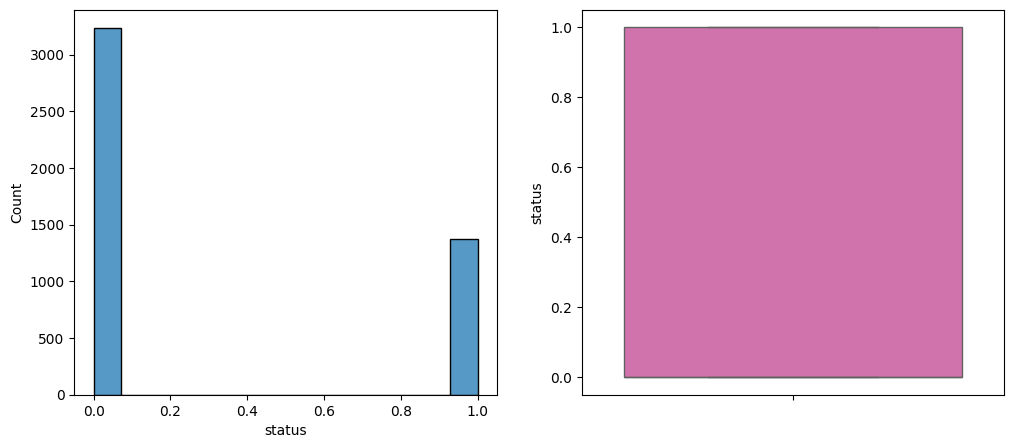

In [26]:
for columns in numerical_data.columns:
  fig, axes = plt.subplots(1, 2, figsize=[12, 5])
  sns.histplot(data[columns], ax=axes[0], palette="Purples")  # Visualizing the data
  sns.boxplot(data[columns], ax=axes[1], palette="PuRd")
  plt.show

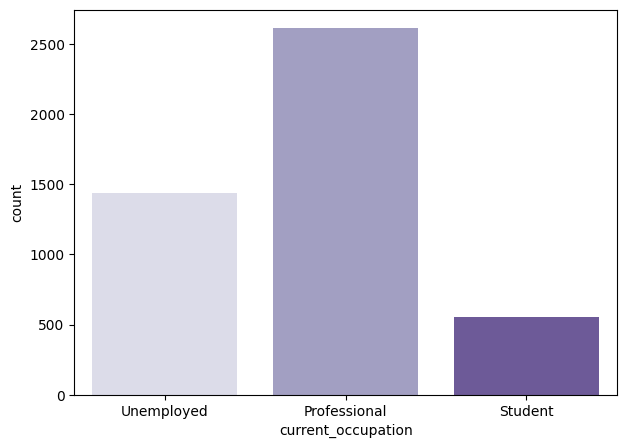

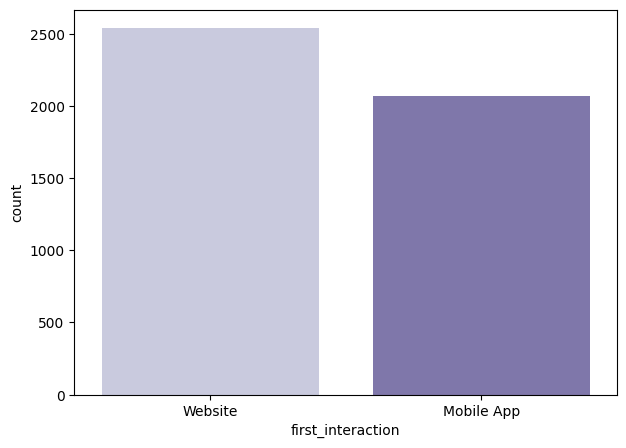

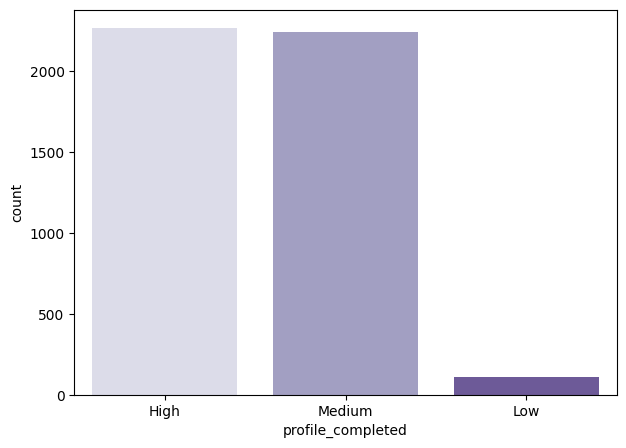

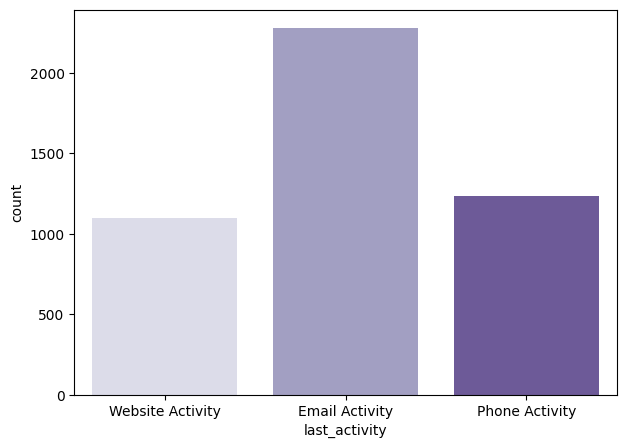

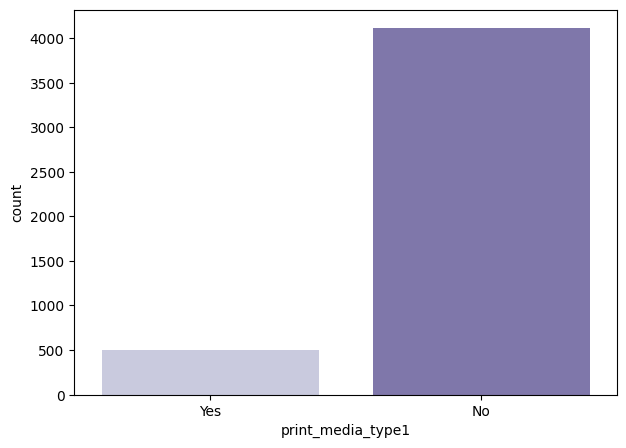

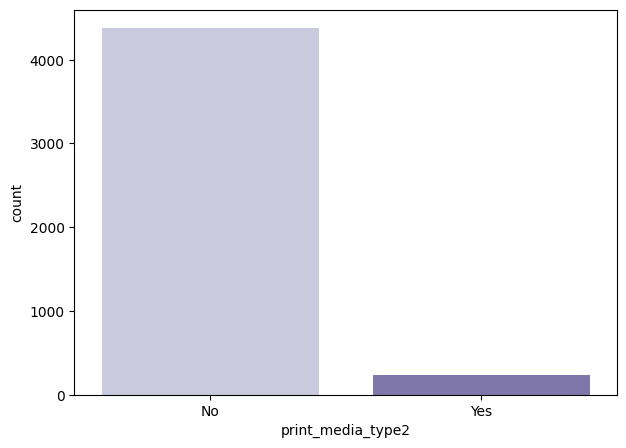

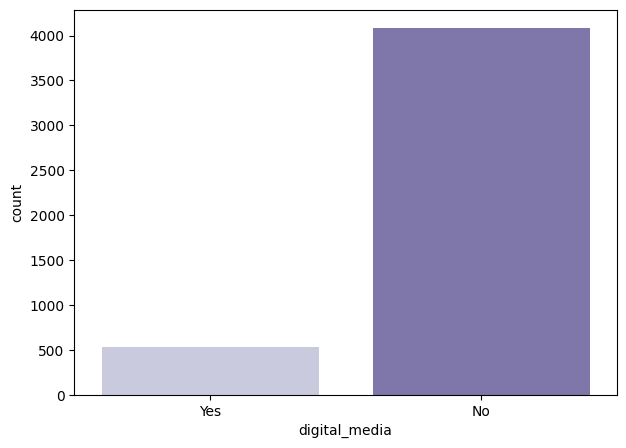

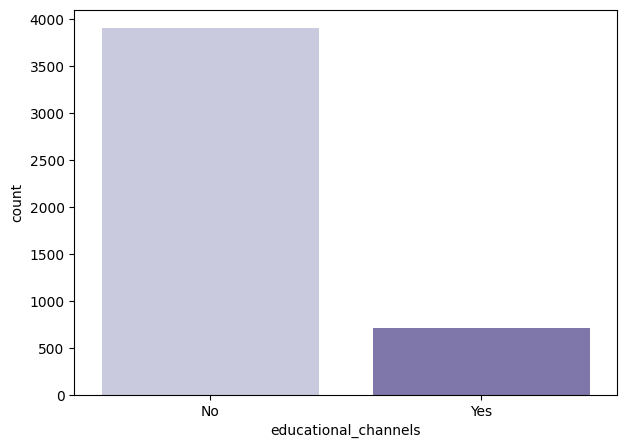

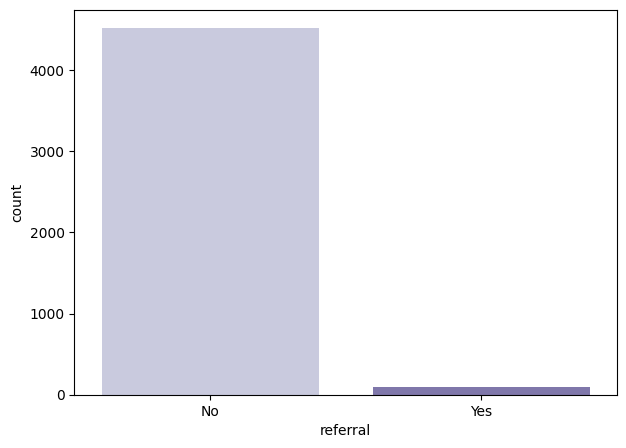

In [27]:
for columns in categorical_data.columns:
    plt.figure(figsize = (7, 5))
    sns.countplot(x = columns ,data = categorical_data, palette="Purples")
    plt.show()

In [18]:
for columns in categorical_data:
    print(data[columns].value_counts())  # Checking how many of each value we have in the categorical features.
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

**Question 1:**

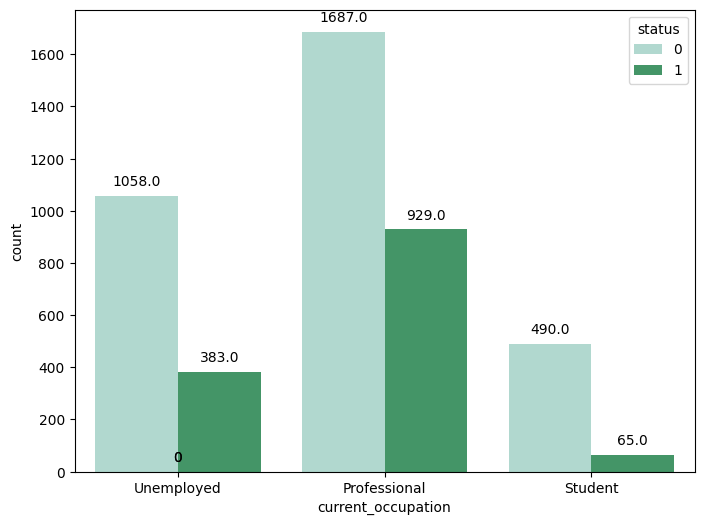

In [30]:
# Find out how current occupation affects lead status

plt.figure(figsize = (8, 6))
quest1 = sns.countplot(x = 'current_occupation', hue = 'status', data = data, palette="BuGn")

for a in quest1.patches:
    quest1.annotate(f'{a.get_height()}', (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [31]:
data.groupby(['current_occupation'])['status'].describe().T

current_occupation,Professional,Student,Unemployed
count,2616.00000,555.00000,1441.00000
mean,0.35512,0.11712,0.26579
std,0.47864,0.32185,0.44191
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,1.00000,0.00000,1.00000
max,1.00000,1.00000,1.00000


**Question 2:**

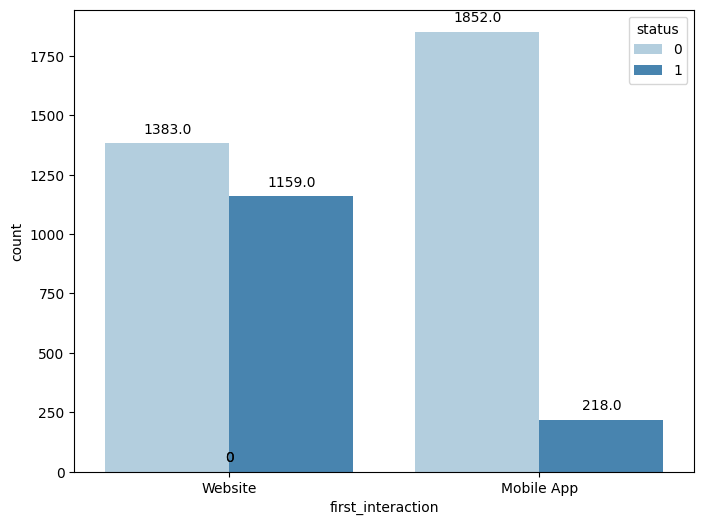

In [32]:
# Do the first channels of interaction have an impact on the lead status?

plt.figure(figsize = (8, 6))
quest2 = sns.countplot(x = 'first_interaction', hue = 'status', data = data, palette='Blues')

for b in quest2.patches:
    quest2.annotate(f'{b.get_height()}', (b.get_x() + b.get_width() / 2., b.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [33]:
data.groupby(["first_interaction"])["current_occupation"].describe().T

first_interaction,Mobile App,Website
count,2070,2542
unique,3,3
top,Professional,Professional
freq,1191,1425


**Question 3:**

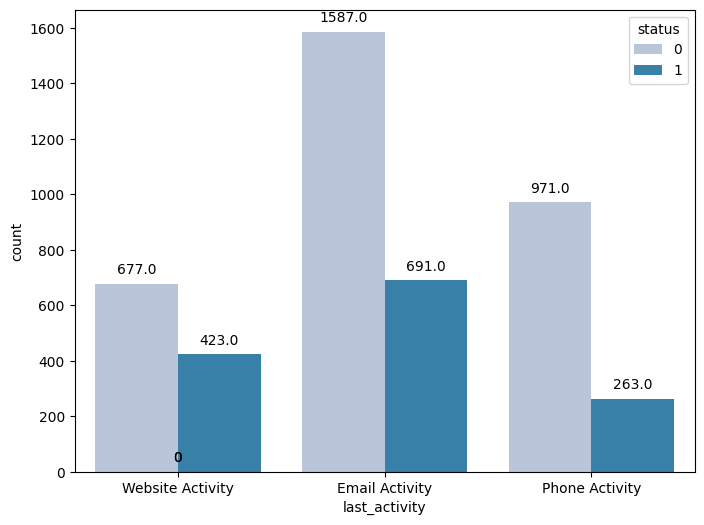

In [34]:
# Which way of interaction works best?

plt.figure(figsize = (8, 6))
quest3 = sns.countplot(x = 'last_activity', hue = 'status', data = data, palette='PuBu')

for c in quest3.patches:
    quest3.annotate(f'{c.get_height()}', (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [35]:
data.groupby(["last_activity"])["current_occupation"].describe().T

last_activity,Email Activity,Phone Activity,Website Activity
count,2278,1234,1100
unique,3,3,3
top,Professional,Professional,Professional
freq,1300,688,628


**Question 4:**

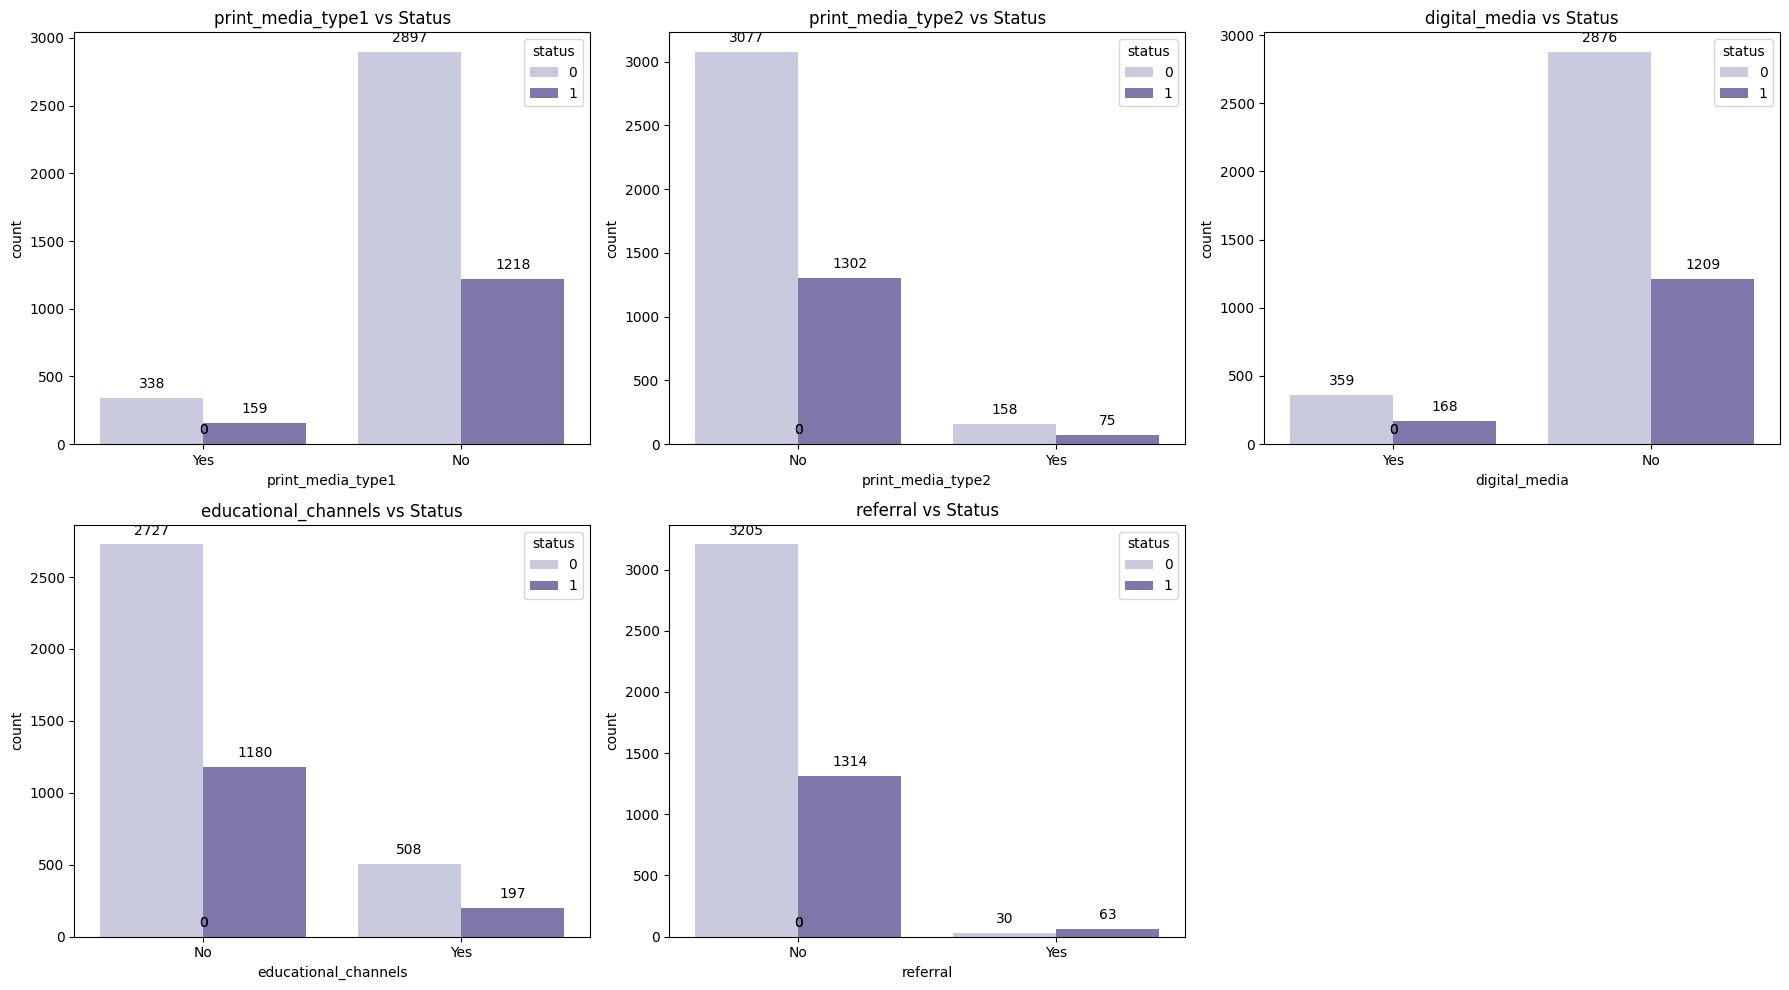

In [36]:
# Which of these channels have the highest lead conversion rate?

channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
num_plots = len(channels)

ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(channels):
    sns.countplot(x=col, hue='status', data=data, ax=axes[i], palette='Purples')
    axes[i].set_title(f'{col} vs Status')

    for d in axes[i].patches:
        axes[i].annotate(
            f'{int(d.get_height())}',
            (d.get_x() + d.get_width() / 2., d.get_height()),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points'
        )

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Question 5:**

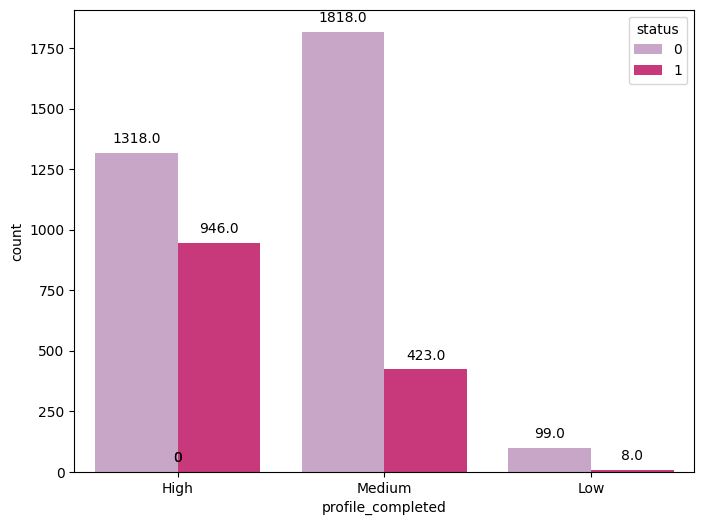

In [37]:
# Does having more details about a prospect increase the chances of conversion?

plt.figure(figsize = (8, 6))

quest5 = sns.countplot(x = 'profile_completed', hue = 'status', data = df, palette='PuRd')
for e in quest5.patches:
    quest5.annotate(f'{e.get_height()}', (e.get_x() + e.get_width() / 2., e.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<Axes: >

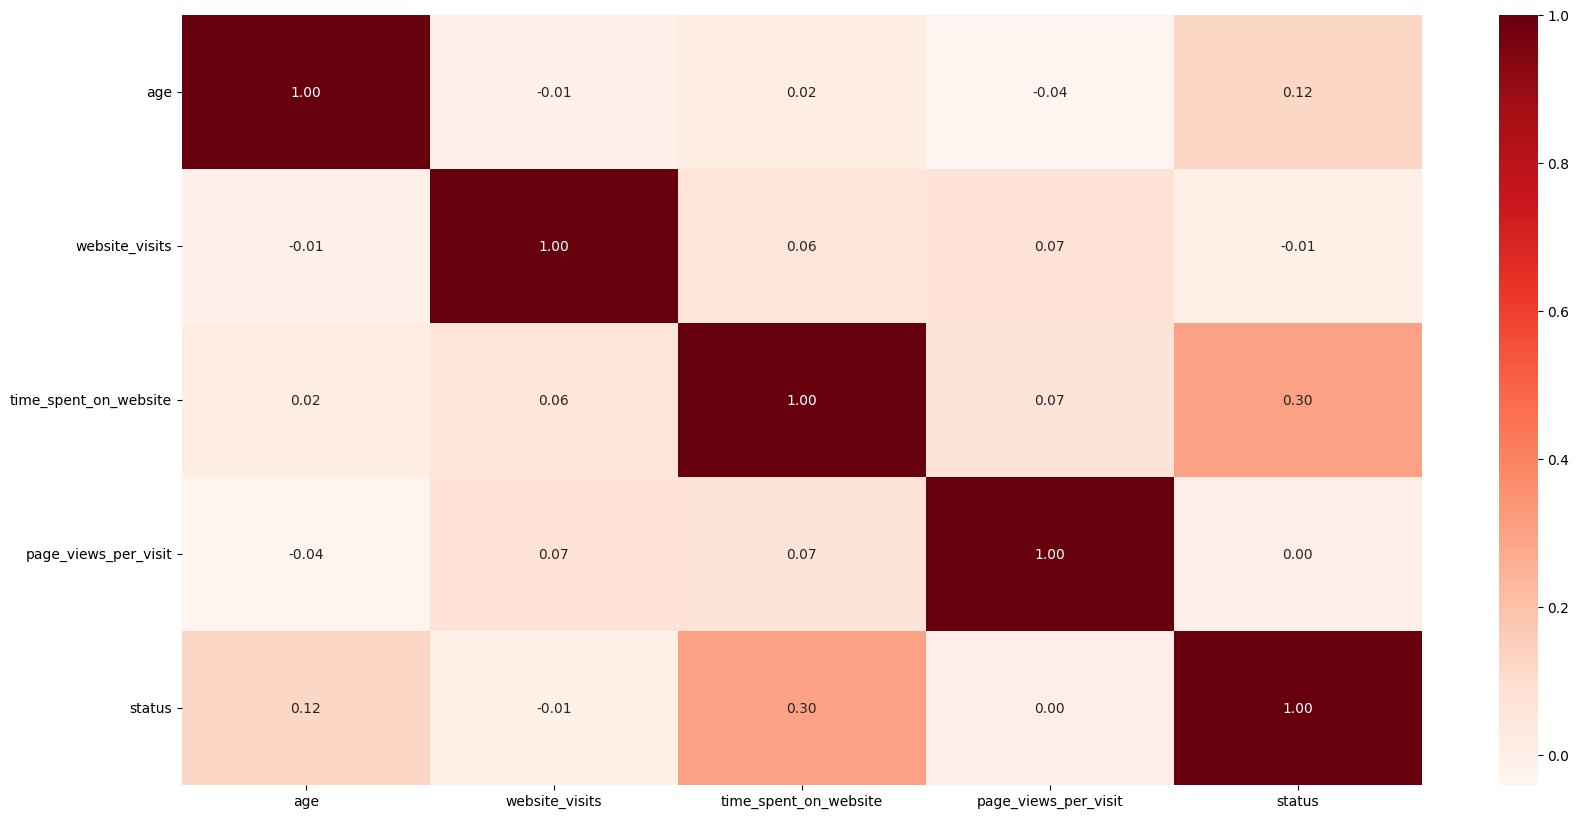

In [38]:
# Checking for possible correlations in the numerical data.

plt.figure(figsize=(20,10))
sns.heatmap(numerical_data.corr(),annot=True, fmt='0.2f', cmap='Reds')

## Building a Decision Tree model

In [39]:
# Separating the "status" feature to Y so we can act on Y to predict "status"
# Categorical values were encoded.

X=data.drop(columns='status')
Y=data['status']

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [40]:
# Changing data types from integer to float.

for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [41]:
# Building the initial decision tree.

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
# Making a function that calculates the confusion matrix and makes a heatmap from it. This will be very useful for visualization.

def metricscore(actual, predicted):

    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.3f', cmap="PuBuGn")
    plt.xticks([0, 1], ['Not Converted', 'Converted'], rotation=90)
    plt.yticks([0, 1], ['Not Converted', 'Converted'], rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



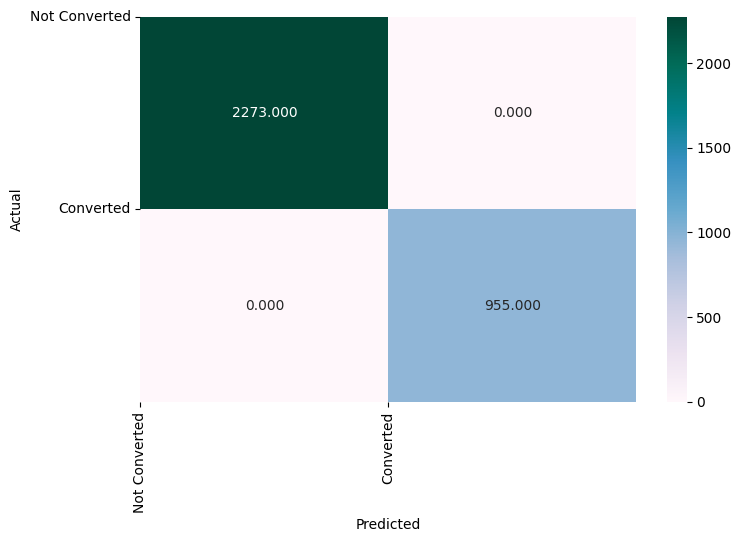

In [43]:
# Comparing the values of the y_train variable with the predicted y_train

y_train_pred = tree.predict(X_train)
metricscore(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



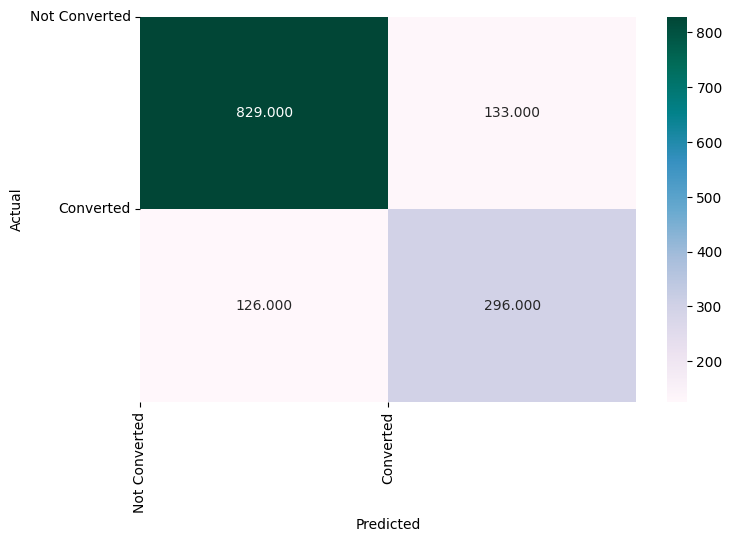

In [44]:
# Same here, just with y_test instead of y_train.

y_test_pred = tree.predict(X_test)
metricscore(y_test, y_test_pred)

In [82]:
# Calculating the accuracy of the decision tree.

accuracy = metrics.accuracy_score(y_test, y_test_pred) * 100
accuracy

81.28612716763006

In [46]:
# Making a new dataframe with the importance values of the features.

pd.DataFrame(tree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = "Importance", ascending = False)

,Importance
time_spent_on_website,0.27784
first_interaction_Website,0.14637
page_views_per_visit,0.12710
profile_completed_Medium,0.12452
age,0.08712
website_visits,0.05096
current_occupation_Unemployed,0.04078
last_activity_Phone Activity,0.03679
current_occupation_Student,0.03328
last_activity_Website Activity,0.02254


In [47]:
# Making new variables for the importances, indices, and features.

importances = tree.feature_importances_
features = list(X_train.columns)
indices = np.argsort(importances)

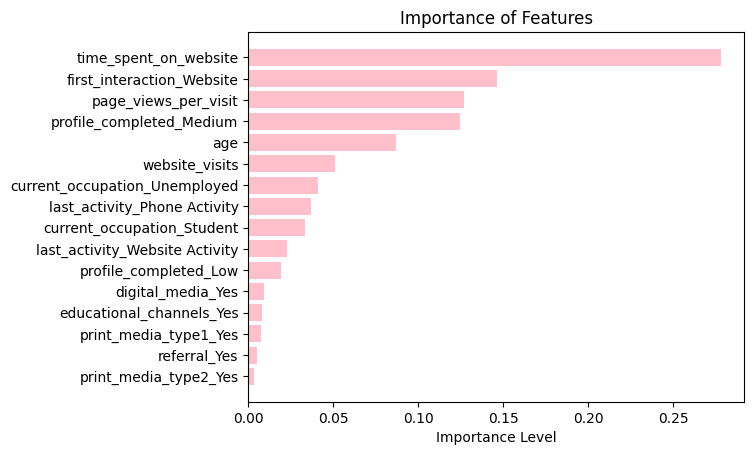

In [48]:
# Visualizing the features' importance.

plt.title('Importance of Features')
plt.barh(range(len(indices)), importances[indices], color = 'pink', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

In [49]:
# Tuning the tree

tree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

param_grid = {
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25]
}

recall_scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=tree_tuned, param_grid=param_grid, scoring=recall_scorer, cv=5, n_jobs=1)
grid_search.fit(X_train, y_train)

best_tree_model = grid_search.best_estimator_
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



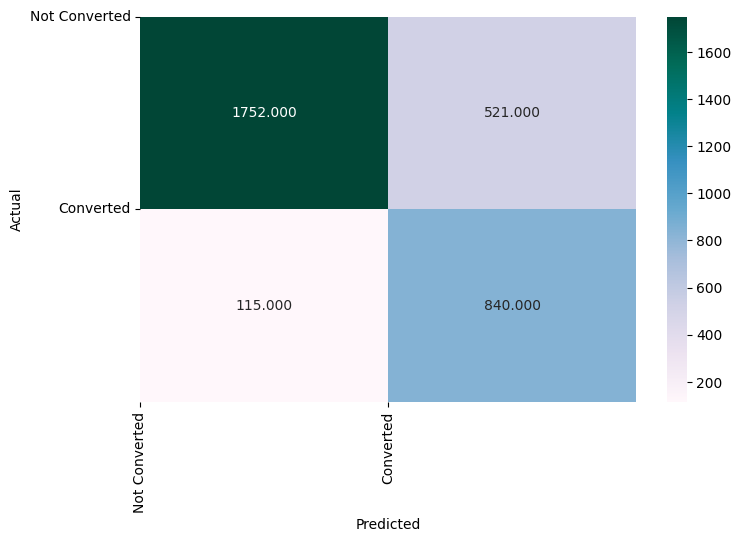

In [50]:
# Visualizing the predicted y_train after tuning the tree.

y_pred_train_tuned = best_tree_model.predict(X_train)
metricscore(y_train, y_pred_train_tuned)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



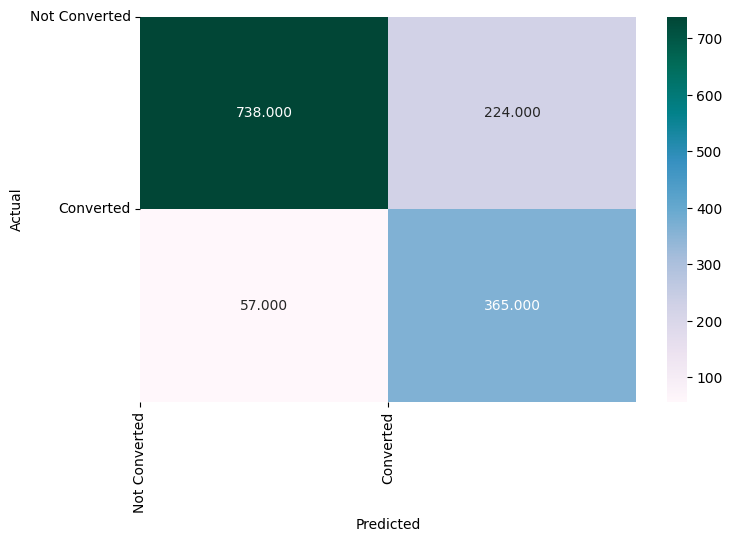

In [51]:
# Same thing but with y_test.

y_pred_test_tuned = best_tree_model.predict(X_test)
metricscore(y_test, y_pred_test_tuned)

In [52]:
# Checking the new accuracy of the tree.

accuracy_tree_tuned = metrics.accuracy_score(y_test,y_pred_test_tuned)*100
accuracy_tree_tuned

79.6965317919075

In [53]:
# Re-checking the importance level of the features after tuning.

pd.DataFrame(best_tree_model.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False)


,Importance
time_spent_on_website,0.34814
first_interaction_Website,0.32718
profile_completed_Medium,0.23927
age,0.06389
last_activity_Website Activity,0.02151
current_occupation_Student,0.00000
page_views_per_visit,0.00000
website_visits,0.00000
profile_completed_Low,0.00000
current_occupation_Unemployed,0.00000


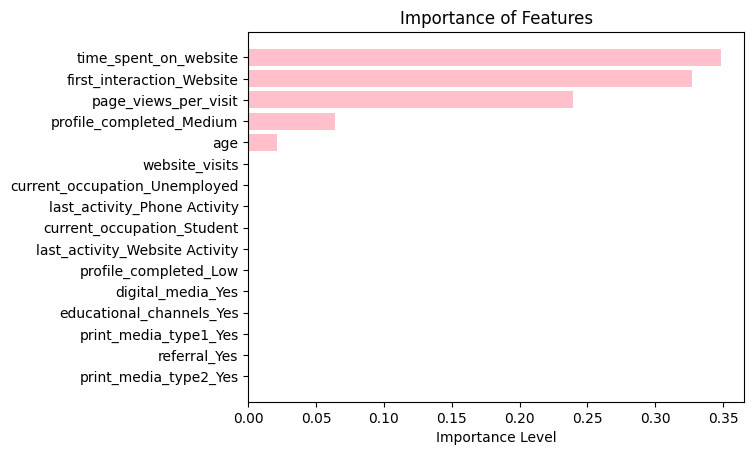

In [54]:
# Graphing the importance level after tuning.

features = list(X.columns)
importances_new = best_tree_model.feature_importances_
indices_new = np.argsort(importances_new)

plt.title('Importance of Features')
plt.barh(range(len(indices_new)), importances_new[indices_new], color = 'pink', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

## Do we need to prune the tree?

In [55]:
# Separating the relevant features for pruning

X_pruned = df[['time_spent_on_website', 'first_interaction', 'profile_completed',
               'last_activity', 'age']]

In [56]:
# Encoding the categorical values, and splitting the data 70/30.

X_pruned = pd.get_dummies(X_pruned, drop_first=True)
X_train_pruned, X_test_pruned, y_train_pruned, y_test_pruned = train_test_split(X_pruned, Y, test_size=0.30, random_state=5)

tree_pruned = DecisionTreeClassifier(random_state = 1)
tree_pruned.fit(X_train_pruned, y_train_pruned)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       1.00      1.00      1.00       932

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



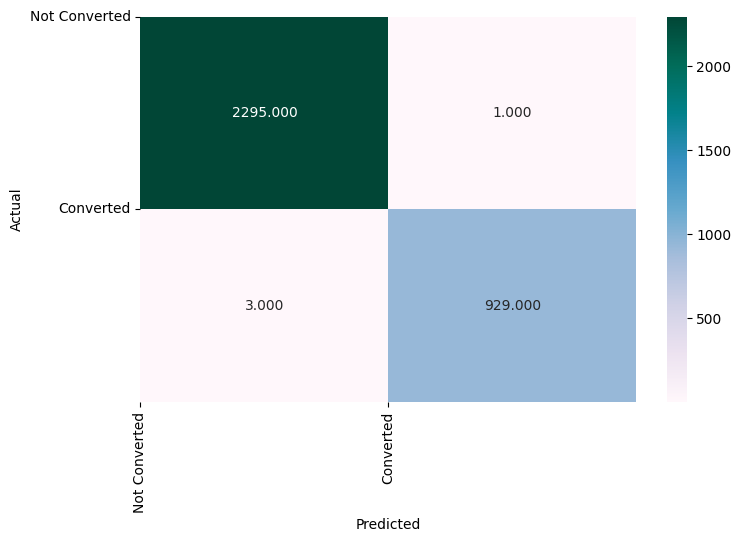

In [57]:
# Checking the performance of the y_train values after pruning.

y_train_pruned_tree = tree_pruned.predict(X_train_pruned)
metricscore(y_train_pruned, y_train_pruned_tree)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       939
           1       0.67      0.68      0.68       445

    accuracy                           0.79      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.79      0.79      0.79      1384



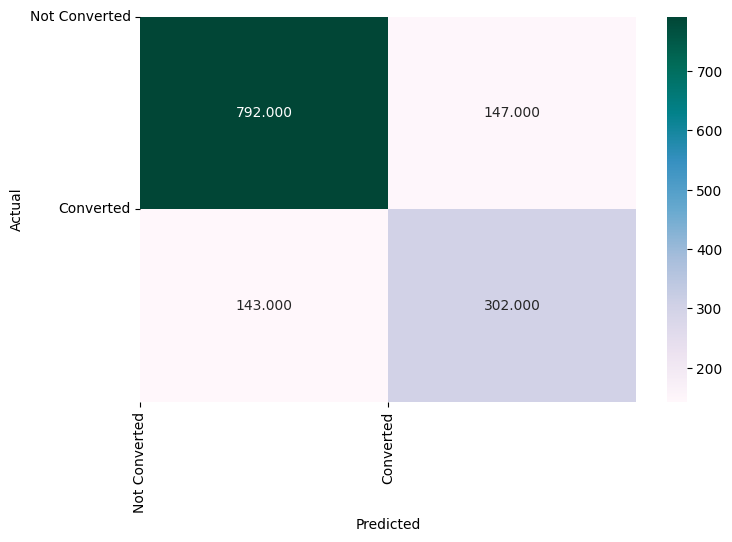

In [58]:
# Same thing but with y_test.

y_test_pruned_tree = tree_pruned.predict(X_test_pruned)
metricscore(y_test_pruned, y_test_pruned_tree)

In [59]:
# Checking the accuracy of the tree after pruning.

accuracy_tree_pruned = metrics.accuracy_score(y_test_pruned, y_test_pruned_tree) * 100
accuracy_tree_pruned

79.04624277456648

## Building a Random Forest model

In [60]:
# Splitting the data 70/30.

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=0.3, random_state=1)

In [61]:
# Converting data types from integer to float.

for columns in ['age', 'website_visits', 'time_spent_on_website']:
    X_train_rf[columns]=X_train_rf[columns].astype('float')
    X_test_rf[columns]=X_test_rf[columns].astype('float')

In [62]:
# Building the random forest

rf =  RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7},random_state = 1)
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



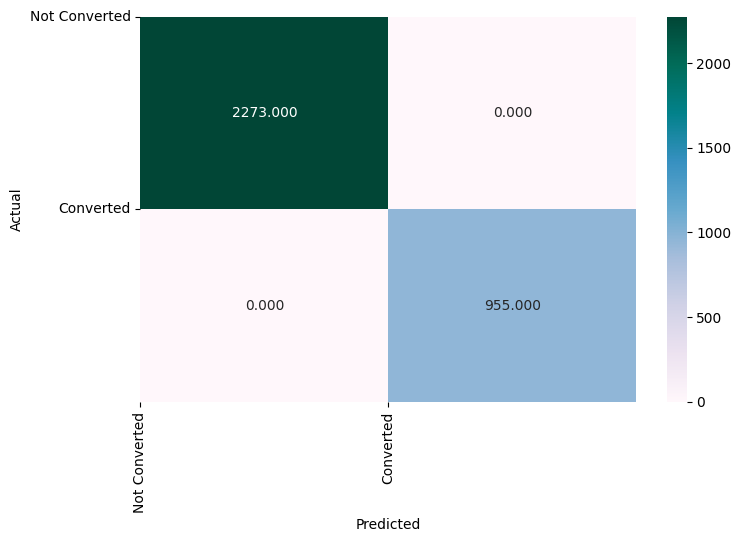

In [63]:
# Checking the performance for the predicted y_train value.

y_pred_train_rf = rf.predict(X_train_rf)
metricscore(y_train_rf, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



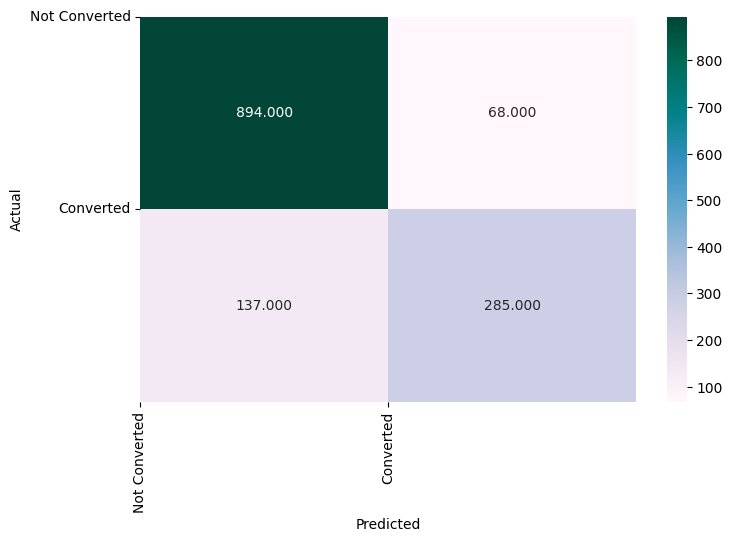

In [64]:
# Same but with the predicted y_test

y_pred_test_rf = rf.predict(X_test_rf)
metricscore(y_test_rf, y_pred_test_rf)

In [65]:
# Re-calculating model accuracy

accuracy_rf = metrics.accuracy_score(y_test_rf,y_pred_test_rf)*100
accuracy_rf

85.1878612716763

In [66]:
# Finding the importance level.

pd.DataFrame(rf.feature_importances_, columns = ["Importance"], index = X_train_rf.columns).sort_values(by = 'Importance', ascending = False)

,Importance
time_spent_on_website,0.26994
first_interaction_Website,0.18989
page_views_per_visit,0.11383
profile_completed_Medium,0.11361
age,0.10436
website_visits,0.05979
last_activity_Phone Activity,0.02746
current_occupation_Unemployed,0.02413
last_activity_Website Activity,0.02020
current_occupation_Student,0.01914


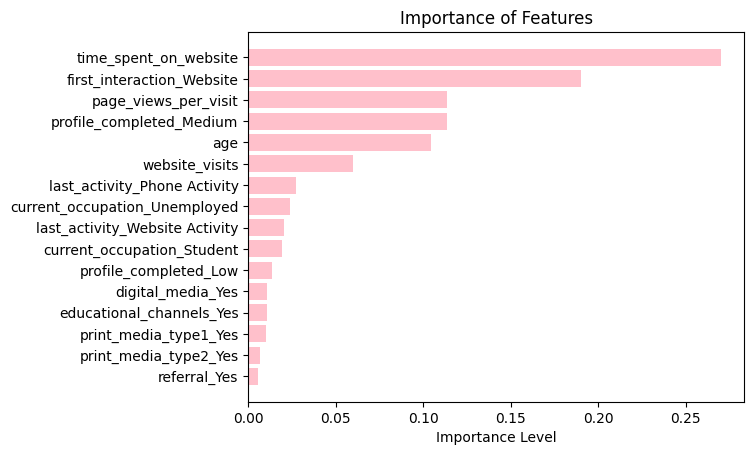

In [69]:
# Plotting the importance level.

eatures = list(X.columns)
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.title('Importance of Features')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color = 'pink', align = 'center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Importance Level')
plt.show()

## Do we need to prune the tree?

In [74]:
# Defining the relevant features needed for pruning.

X_rf_pruned = df[['time_spent_on_website', 'first_interaction', 'profile_completed', 'last_activity', 'age']]

X_rf_pruned = pd.get_dummies(X_rf_pruned, drop_first=True)

In [75]:
# Data split, 70/30.

X_train_rf_pruned, X_test_rf_pruned, y_train_rf_pruned, y_test_rf_pruned = train_test_split(X_rf_pruned, Y, test_size=0.30, random_state=1)

In [77]:
# Building the model.

rf_pruned = RandomForestClassifier(random_state = 1)
rf_pruned.fit(X_train_rf_pruned, y_train_rf_pruned)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      0.99      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



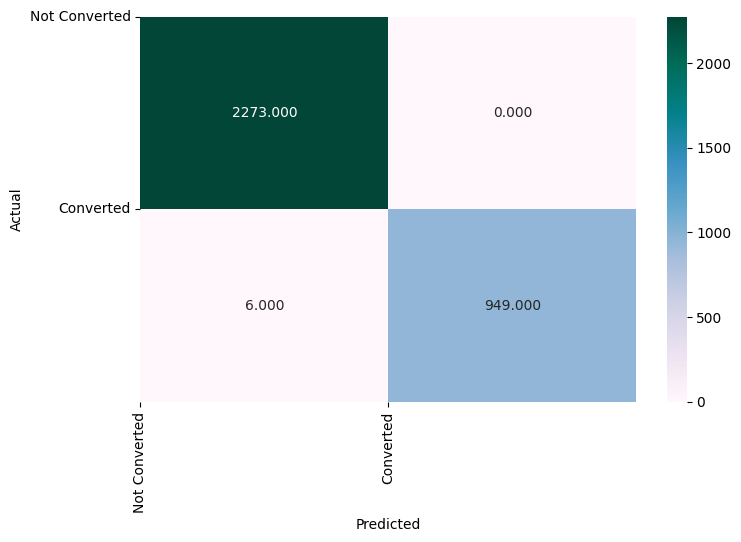

In [78]:
# You already know.

y_train_pruned_pred_rf = rf_pruned.predict(X_train_rf_pruned)
metricscore(y_train_rf_pruned, y_train_pruned_pred_rf)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       962
           1       0.73      0.69      0.71       422

    accuracy                           0.83      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.83      0.83      0.83      1384



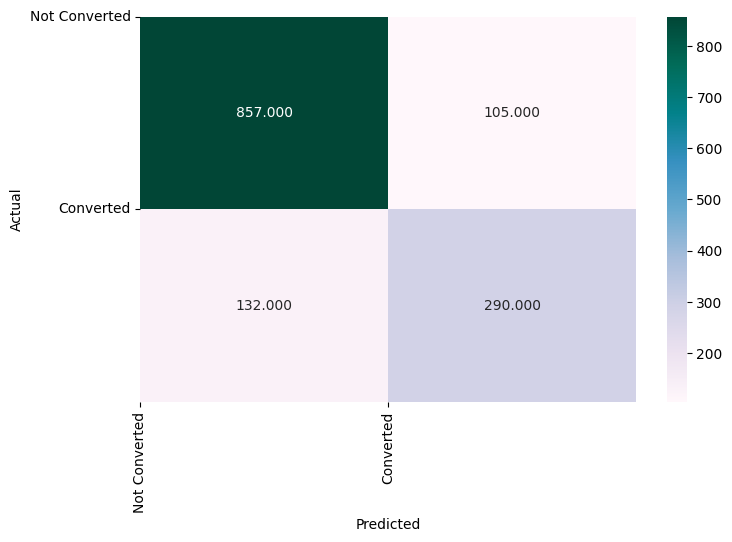

In [79]:
y_test_pruned_pred_rf = rf_pruned.predict(X_test_rf_pruned)
metricscore(y_test_rf_pruned, y_test_pruned_pred_rf)

In [80]:
accuracy_rf_pruned = metrics.accuracy_score(y_test_rf_pruned, y_test_pruned_pred_rf) * 100
accuracy_rf_pruned

82.87572254335261

## Actionable Insights and Recommendations

1. Prioritize High-Spending Customers
Focus marketing efforts on customers with a high predicted spending score. These individuals are more likely to convert and generate higher revenue. Use targeted ads, loyalty programs, or exclusive offers to retain and upsell to this segment.

2. Address the Medium Spending Segment
Customers with mid-level spending scores show potential but may need further engagement. Use personalized emails or product recommendations to encourage increased interaction and purchases.

3. Develop Strategies for Low Spending Customers
Investigate why customers with low scores are underperforming. Are they new users, inactive, or mismatched to the product offering? Consider onboarding campaigns, special promotions, or surveys to better understand and reactivate this segment.

4. Utilize Clustering for Personalized Marketing
The K-Means clustering revealed three distinct customer groups. Tailor marketing campaigns and communication styles to the preferences and behaviors of each cluster to improve response rates and customer satisfaction.

5. Optimize Customer Acquisition Strategy
By identifying traits that correlate with high spending scores (e.g., age, income), you can refine your targeting criteria to attract more valuable leads. Use lookalike audiences based on high-scoring customers for better ad performance.

6. Leverage Visual Dashboards for Real-Time Decisions
The implemented dashboard offers dynamic insights into customer segmentation and predictions. Use it to monitor trends, track campaign performance, and quickly adjust strategies based on up-to-date data.

7. Iterate on the Predictive Model
Continue refining the regression and classification models with additional features such as purchase history, time since last interaction, or website behavior. This will improve accuracy and decision-making capabilities.